# Did you perceive the Tinnitus right now?
### Crosstab by season and country


In [1]:
# project location
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\')

In [2]:
# imports
import pandas as pd
from d00_utils import utilities as u
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in df
df = pd.read_csv(p_loc + '/data/02_intermediate/merged_users.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'fup_answer_from', 'bl_answer_from'],na_values = ['??.??.????', '27.02.2522']
                )

In [5]:
# number of countries
df.country.unique().shape

(111,)

In [4]:
# improve readability
df.rename(columns = {'question1':'Tinnitus_right_now'}, inplace = True)
df.Tinnitus_right_now.replace({0.0: 'No', 1.0: 'Yes'}, inplace = True)

In [5]:
df['fup_season'] = df.fup_answer_from.dt.date.apply(u.get_season)

C:\Users\joa24jm\Documents\tinnitus-country\src\d00_utils\utilities.py:172: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start <= d <= end)


## Check distribution for Norway

In [36]:
# check for norway users as they have 50% tinnitus  and 50% tinnitus NO
norway_filt = df['Country_Name'] == 'Norway, Kingdom of'

In [37]:
# how many users from Norway?
df[norway_filt].user_id.unique().shape

(42,)

In [7]:
for season in ['spring', 'summer', 'autumn', 'winter']:
    season_filt = df['fup_season'] == season
    print('Season\t\t', season)
    print('No. of users\t', df[season_filt & norway_filt].user_id.unique().shape[0])

Season		 spring
No. of users	 6
Season		 summer
No. of users	 11
Season		 autumn
No. of users	 16
Season		 winter
No. of users	 7


####  Norway has about 50% Tinnitus YES and 50 % Tinnitus NO reportings. How do the reportings vary over seasons?

In [8]:
pd.crosstab(df[df.Country_Name == 'Norway, Kingdom of'].fup_season, df.Tinnitus_right_now, normalize = 'index')


Tinnitus_right_now,No,Yes
fup_season,,
autumn,0.587361,0.412639
spring,0.417178,0.582822
summer,0.360577,0.639423
winter,0.702875,0.297125


## Check distributions for other countries in Europe

In [16]:
# get top 5 countries with most answers for Tinnitus = YES 
countries = ['Germany, Federal Republic of',
             'Netherlands, Kingdom of the',
             'Switzerland, Swiss Confederation',
             'United Kingdom of Great Britain & Northern Ireland',
             'Norway, Kingdom of']

In [17]:
# sort tinnitus answers by country and season
ct = pd.crosstab([df[df.Country_Name.isin(countries)].Country_Name, df[df.Country_Name.isin(countries)].fup_season], df.Tinnitus_right_now,
                normalize='index')

In [18]:
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [19]:
ct

Tinnitus_right_now                                                   No  \
Country_Name                                       fup_season             
Germany, Federal Republic of                       spring      0.223920   
                                                   summer      0.219304   
                                                   autumn      0.169706   
                                                   winter      0.235056   
Netherlands, Kingdom of the                        spring      0.352028   
                                                   summer      0.101167   
                                                   autumn      0.370302   
                                                   winter      0.374474   
Norway, Kingdom of                                 spring      0.417178   
                                                   summer      0.360577   
                                                   autumn      0.587361   
                                                   winter      0.702875   
Switzerland, Swiss Confederation                   spring      0.312107   
                                                   summer      0.250427   
                                                   autumn      0.348889   
                                                   winter      0.392694   
United Kingdom of Great Britain & Northern Ireland spring      0.156069   
                                                   summer      0.042770   
                                                   autumn      0.278978   
                                                   winter      0.341102   

Tinnitus_right_now                                                  Yes  
Country_Name                                       fup_season            
Germany, Federal Republic of                       spring      0.776080  
                                                   summer      0.780696  
                                                   autumn      0.830294  
                                                   winter      0.764944  
Netherlands, Kingdom of the                        spring      0.647972  
                                                   summer      0.898833  
                                                   autumn      0.629698  
                                                   winter      0.625526  
Norway, Kingdom of                                 spring      0.582822  
                                                   summer      0.639423  
                                                   autumn      0.412639  
                                                   winter      0.297125  
Switzerland, Swiss Confederation                   spring      0.687893  
                                                   summer      0.749573  
                                                   autumn      0.651111  
                                                   winter      0.607306  
United Kingdom of Great Britain & Northern Ireland spring      0.843931  
                                                   summer      0.957230  
                                                   autumn      0.721022  
                                                   winter      0.658898

In [21]:
# get the number of answers per country
ns = pd.crosstab(df.Country_Name, df.Tinnitus_right_now, normalize = False).sum(axis = 1)

In [24]:
ns

Country_Name
Albania, Republic of                           7
Algeria, People's Democratic Republic of       7
American Samoa                                 1
Andorra, Principality of                       6
Angola, Republic of                            4
                                            ... 
United States of America                    9424
Uruguay, Eastern Republic of                   1
Vanuatu, Republic of                           2
Venezuela, Bolivarian Republic of             65
Yemen                                          2
Length: 103, dtype: int64

#### Plot Tinnitus YES NO distribution by country and season

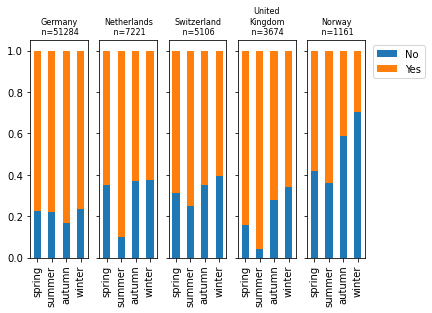

In [26]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = len(countries), sharey=True)

labels = ['spring', 'summer', 'autmn', 'winter']
country_names = ['Germany', 'Netherlands', 'Switzerland', 'United Kingdom', 'Norway']

for country, ax, t in zip(countries, axes, country_names):
        
    ct.loc[country][['No', 'Yes']].plot.bar(stacked = True, ax = ax)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # set log scale and labels
    names = '\n'.join(t.split(' '))
    n = '\n n=' + str(ns[country])
    title = names + n
    
    ax.set_title(title, fontsize=8)
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


## Plot distribution by continent

In [27]:
ct = pd.crosstab([df.Continent_Name, df.fup_season], df.Tinnitus_right_now, normalize = 'index')
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [28]:
# Number of answers per continent and season
ns = pd.crosstab(df.Continent_Name, df.Tinnitus_right_now, normalize = False).sum(axis = 1)

In [29]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

Text(0.5, 1.05, 'Did you perceive the tinnitus right now?')

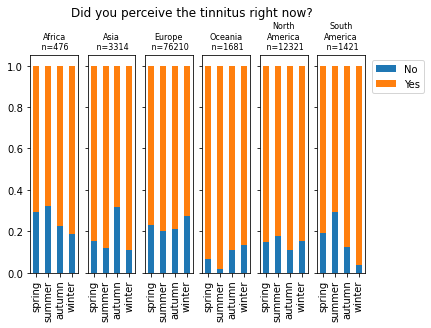

In [30]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = len(continents), sharey=True)

labels = ['spring', 'summer', 'autmn', 'winter']

for continent, ax, t in zip(continents, axes, continents):
        
    ct.loc[continent][['No', 'Yes']].plot.bar(stacked = True, ax = ax)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    names = '\n'.join(t.split(' '))
    n = '\n n=' + str(ns[continent])
    title = names + n
    
    # set log scale and labels
    ax.set_title(title, fontsize=8)
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Did you perceive the tinnitus right now?', y = 1.05)

In [38]:
pd.crosstab(df.fup_season, df.Tinnitus_right_now)

Tinnitus_right_now,No,Yes
fup_season,,
autumn,5081,20517
spring,4805,17546
summer,4532,18411
winter,6022,18532
